# Wine Quality Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from IPython import display
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder

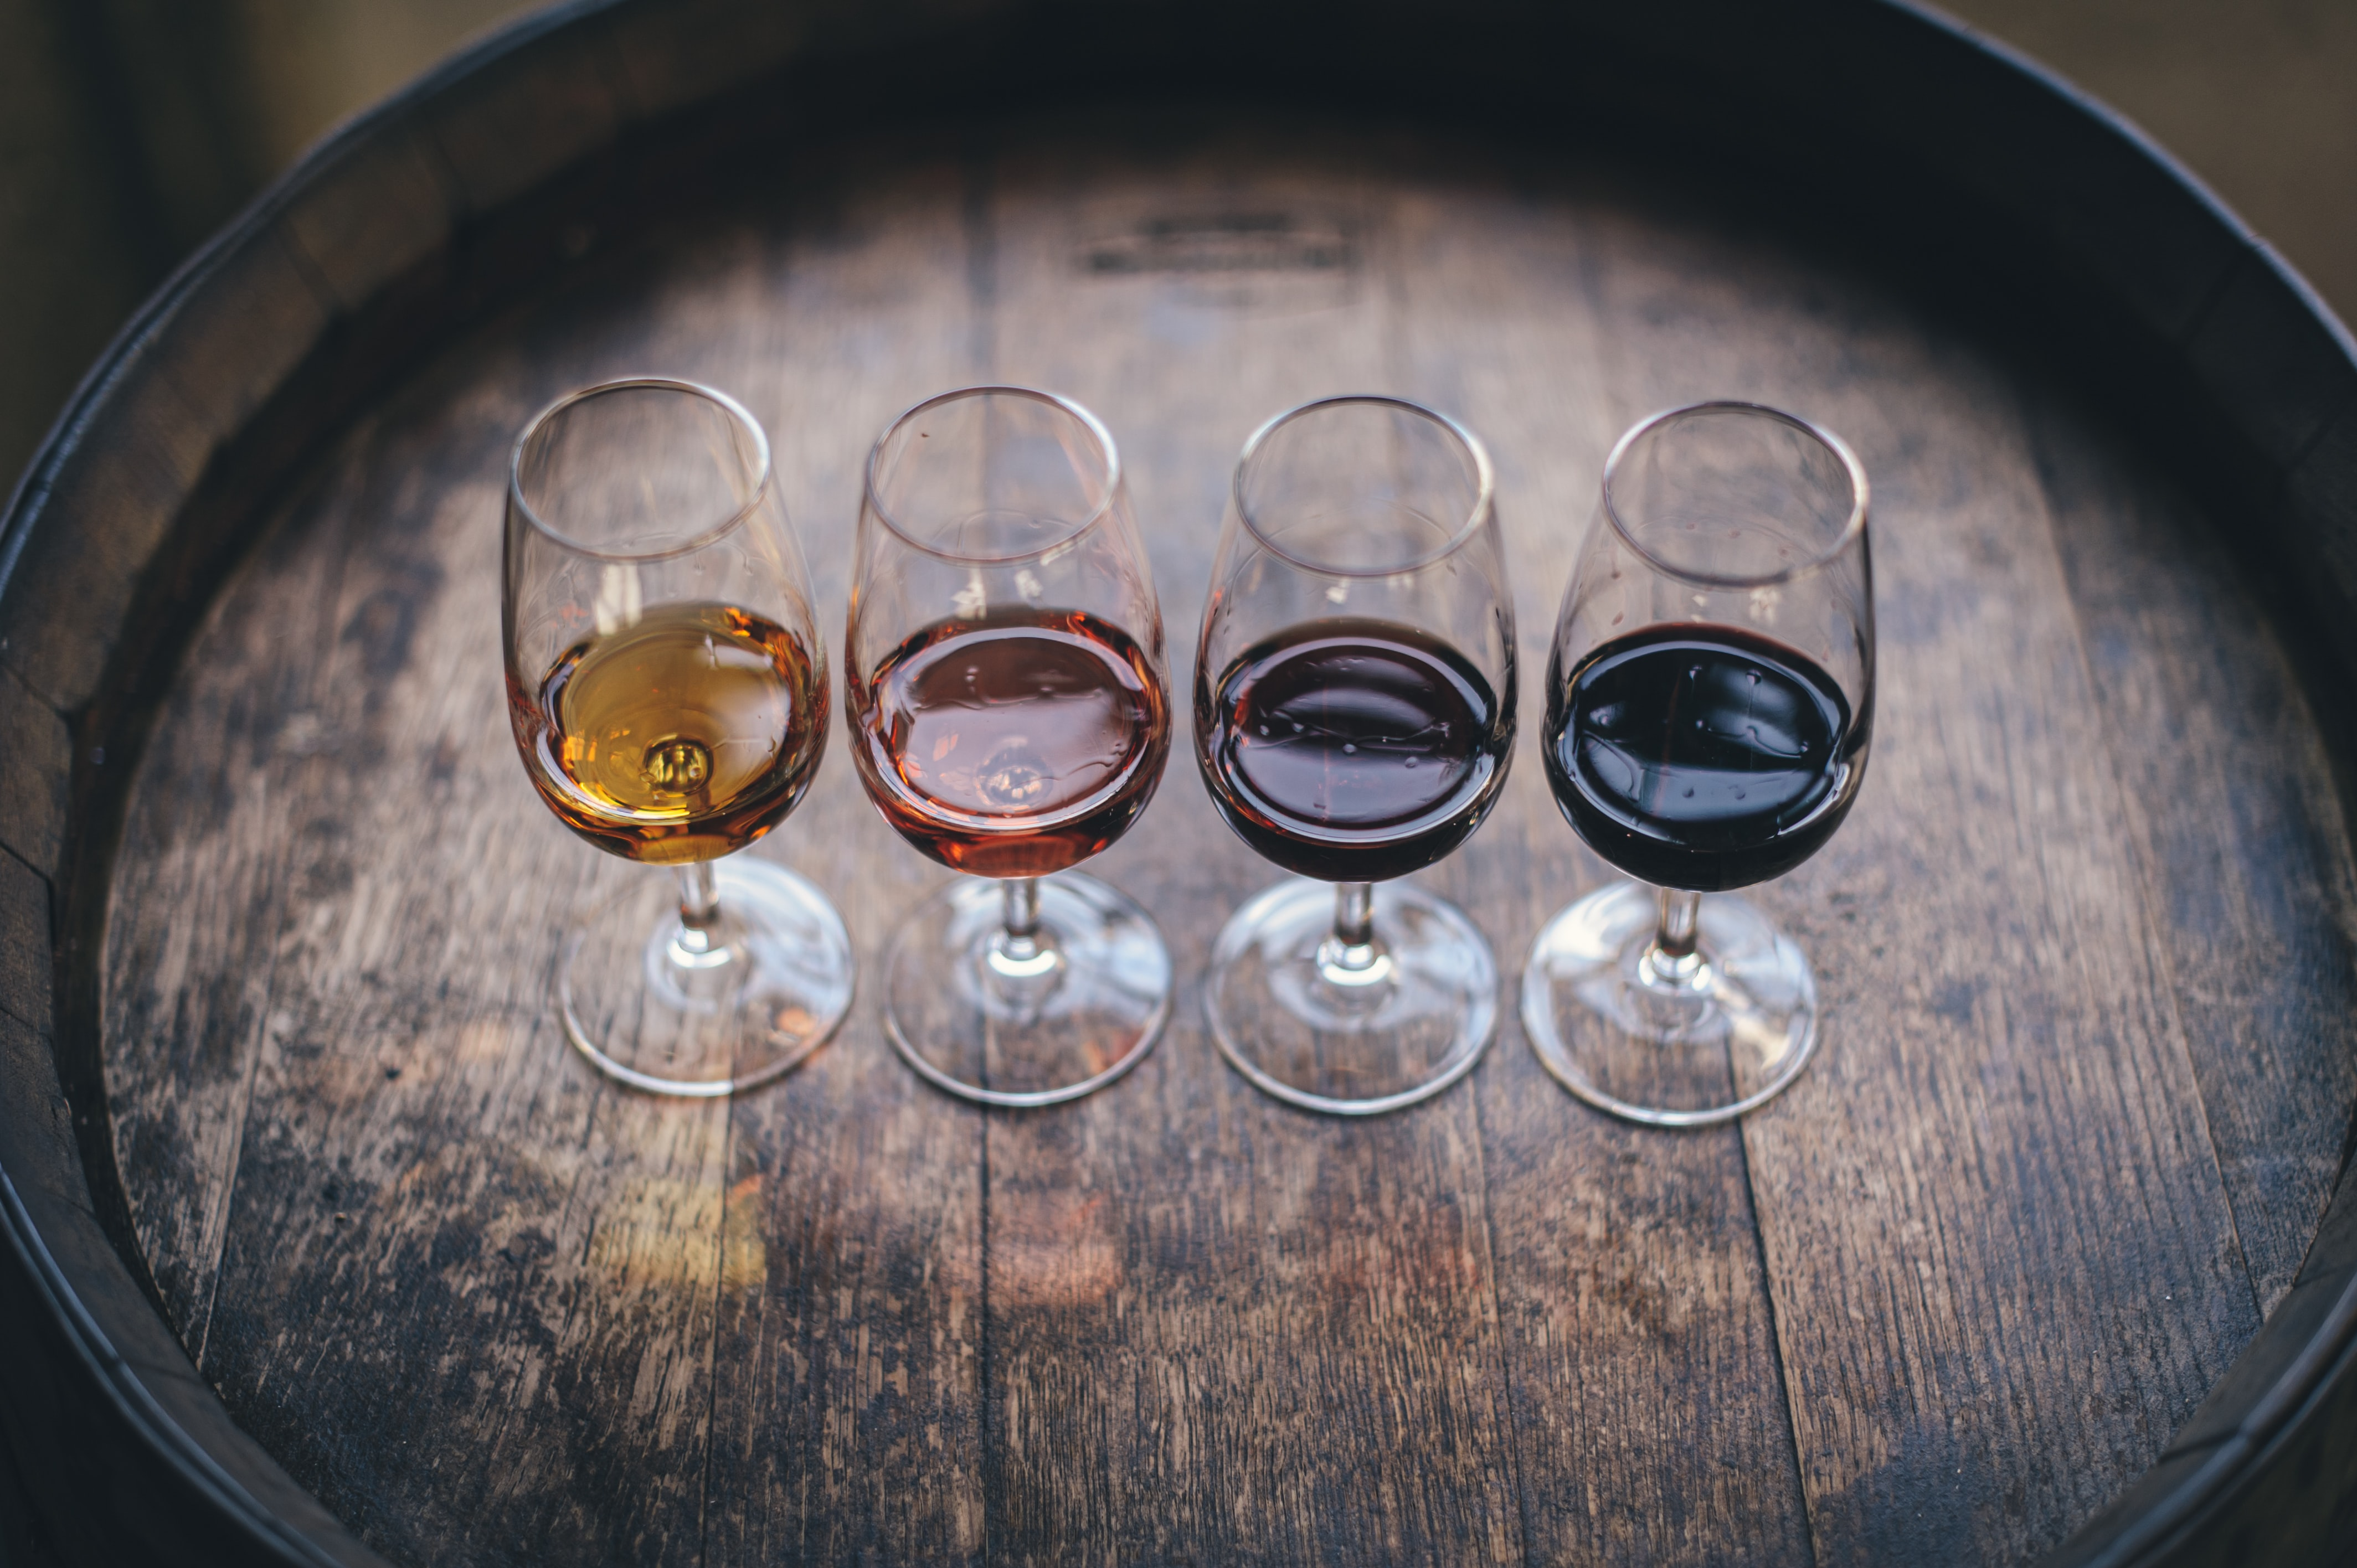

In [2]:
display.Image("images/2.jpg")

In [3]:
data = pd.read_csv('Data/winequality.csv')

In [4]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
data.shape

(6497, 13)

## Data Description
**Input variables:**

- type
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

**Output variable:**

- quality (score between 0 and 10)

# Exploratory Data Analysis

In [6]:
data.isnull().values.any()

True

In [7]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data = data.dropna()
data.shape

(6463, 13)

In [9]:
data.isnull().values.any()

False

In [10]:
duplicate_entries = data[data.duplicated()]
duplicate_entries.shape
print("Number of duplicated rows :",data.duplicated().sum())

Number of duplicated rows : 1168


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data['quality'].value_counts()

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   object 
 1   fixed acidity         5295 non-null   float64
 2   volatile acidity      5295 non-null   float64
 3   citric acid           5295 non-null   float64
 4   residual sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free sulfur dioxide   5295 non-null   float64
 7   total sulfur dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   pH                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 579.1+ KB


In [14]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5295.000000       5295.000000  5295.000000     5295.000000   
mean        7.218008          0.344021     0.318782        5.051029   
std         1.320690          0.168237     0.147112        4.500641   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5295.000000          5295.000000           5295.000000  5295.000000   
mean      0.056690            30.046837            114.118225     0.994536   
std       0.036901            17.827151             56.787187     0.002969   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994670   
75%       0.066000            41.000000            154.000000     0.996780   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5295.000000  5295.000000  5295.000000  5295.000000  
mean      3.224385     0.533199    10.550154     5.796034  
std       0.160155     0.149851     1.186533     0.880005  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

# Data Visualization

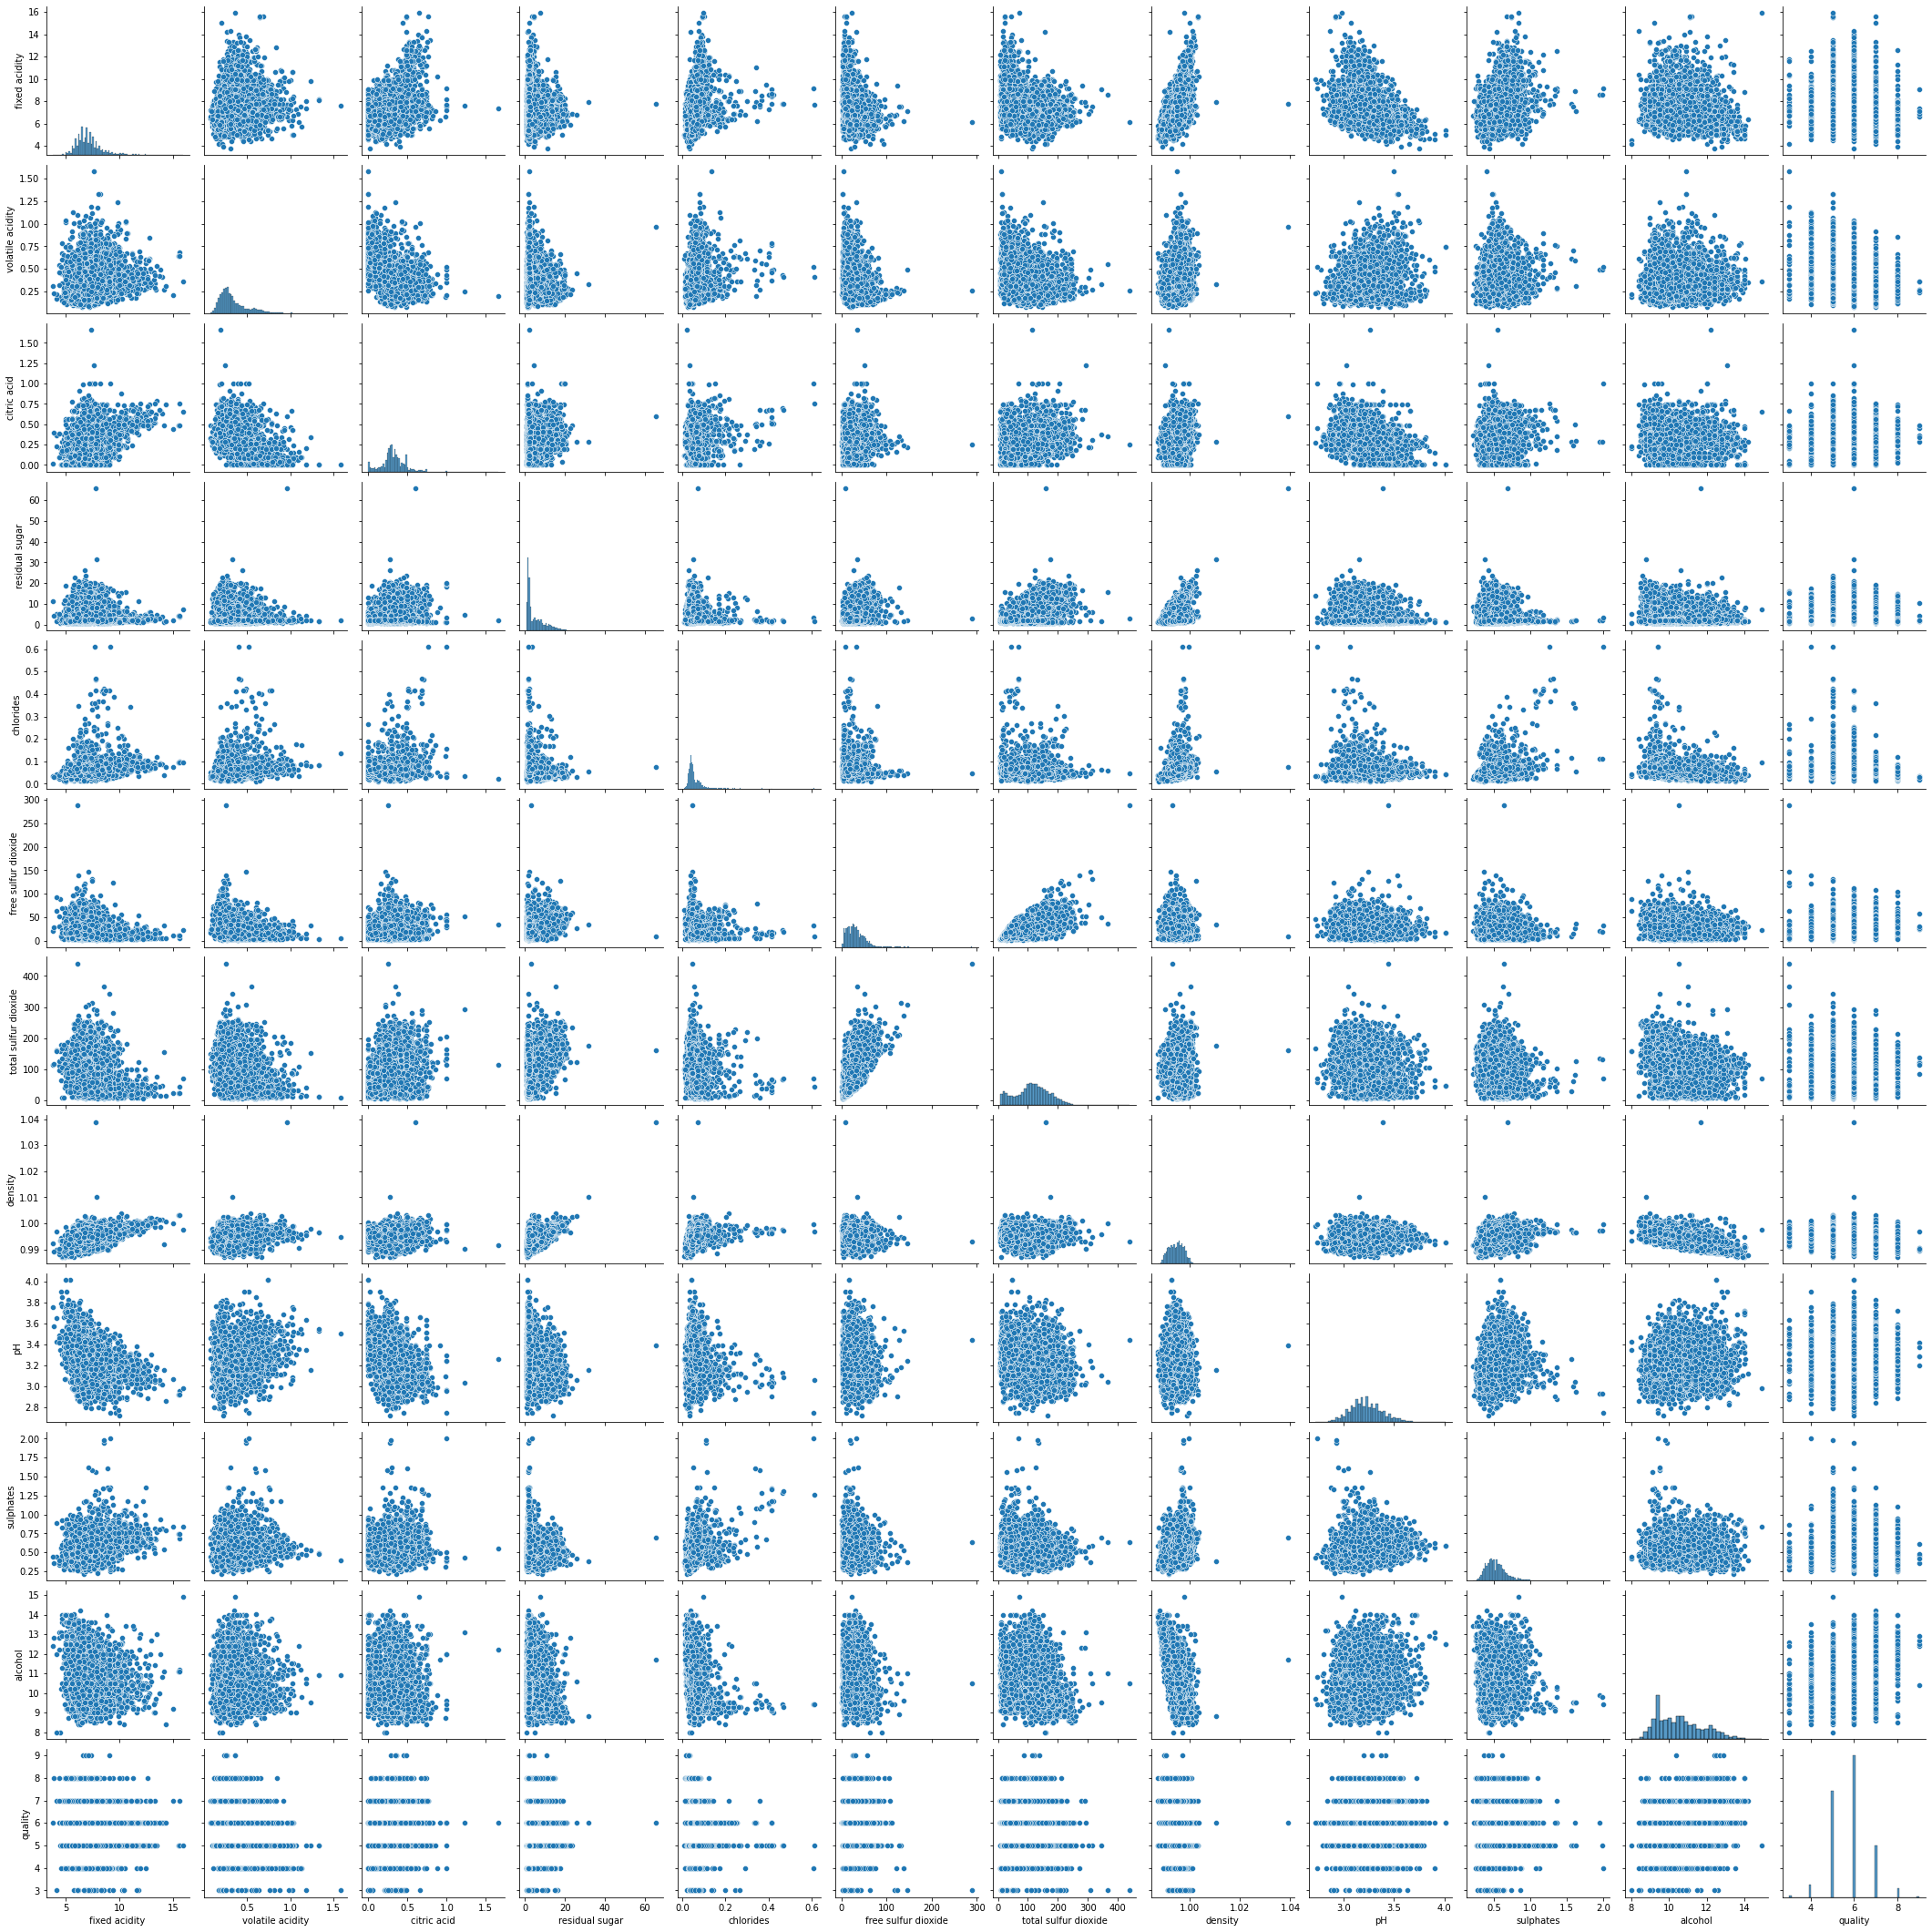

In [15]:
sns.pairplot(data)
plt.show()

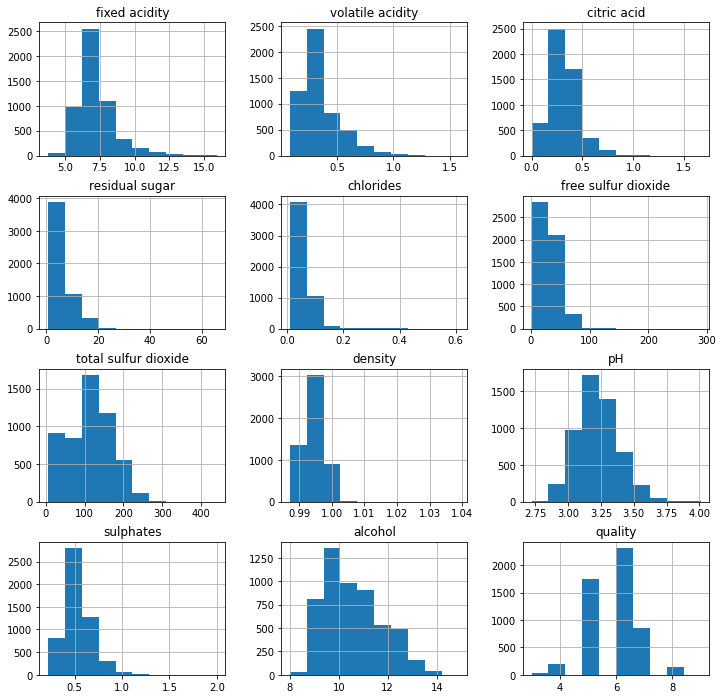

In [16]:
data.hist(figsize=(12,12))
plt.show()

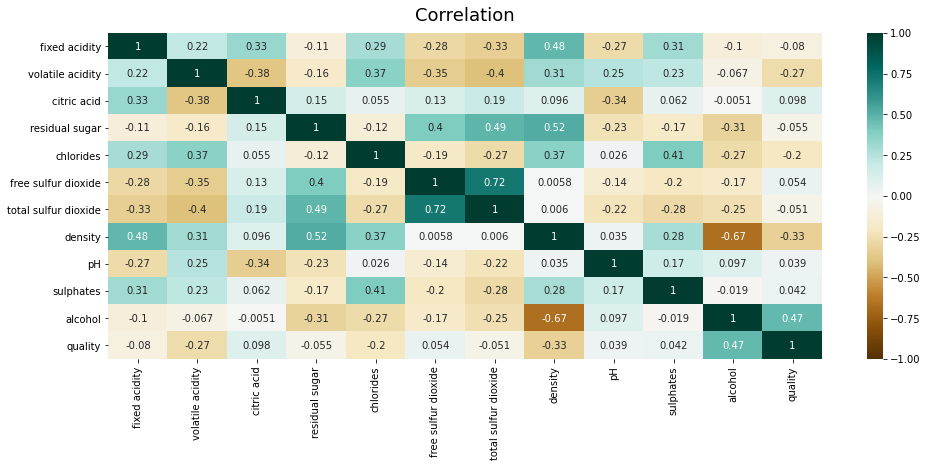

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=12)
plt.show()
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight') 

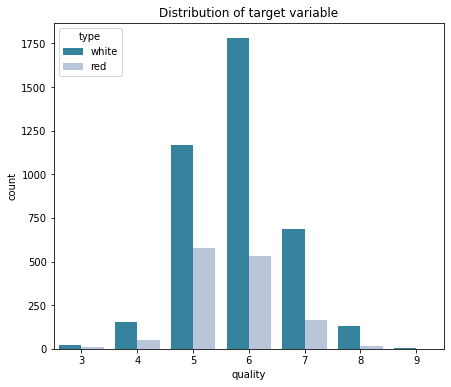

In [18]:
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="quality", hue="type", data=data, palette="PuBuGn_r")
ax.set_title('Distribution of target variable')
plt.show()

In [19]:
data.replace(to_replace='white', value=1, inplace=True)
data.replace(to_replace='red', value=0, inplace=True)

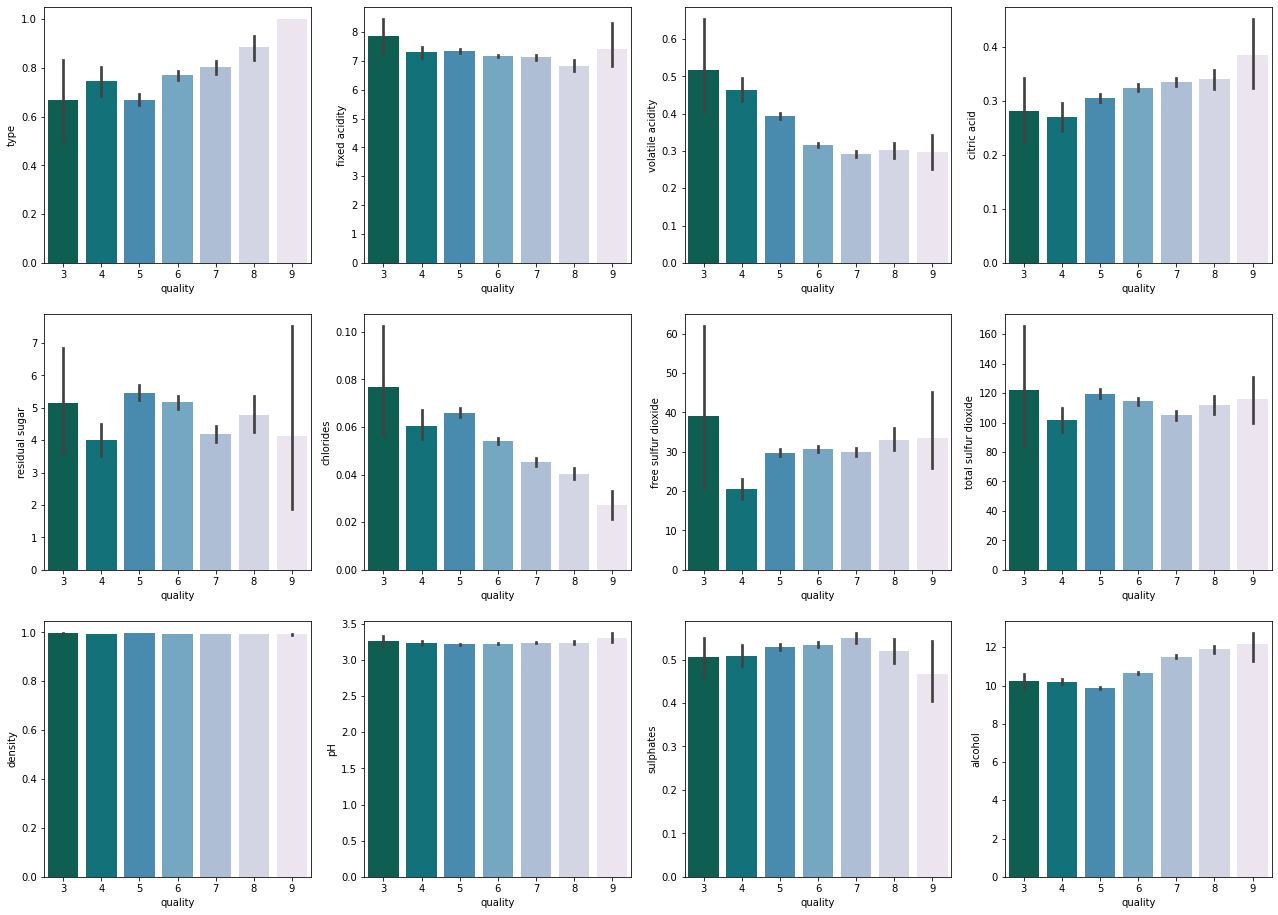

In [20]:
fig, ax1 = plt.subplots(3,4,figsize=(22,16), )
k = 0
columns = list(data.columns)
for i in range(3):
    for j in range(4):
            sns.barplot(data['quality'], data[columns[k]], ax = ax1[i][j], palette="PuBuGn_r")
            k += 1
plt.show()

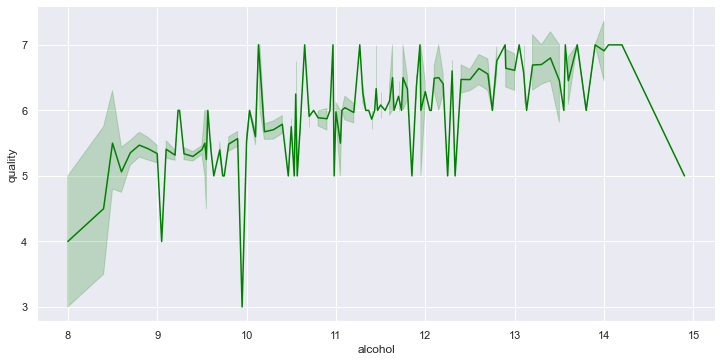

In [21]:
sns.set()
sns.relplot(data=data, x='alcohol', y='quality', kind='line', height=5, aspect=2, color='green')
plt.show()

## Target Variable 

I think use three types of target variable. First will be multiclass. Then will be two classes "good"(6,7,8,9) and "bad"(3,4,5). And the last will be three class's "bad"(3,4,5), "good"(6) and "very goog"(7,8,9)

In [22]:
d1= data['quality'].copy()
d2= data['quality'].copy()
d3= data['quality'].copy()
final_label= data['quality'].copy()

In [23]:
d2.replace(to_replace=6, value=1, inplace=True)
d2.replace(to_replace=7, value=1, inplace=True)
d2.replace(to_replace=8, value=1, inplace=True)
d2.replace(to_replace=9, value=1, inplace=True)
d2.replace(to_replace=3, value=0, inplace=True)
d2.replace(to_replace=4, value=0, inplace=True)
d2.replace(to_replace=5, value=0, inplace=True)

In [24]:
d2.value_counts()

1    3316
0    1979
Name: quality, dtype: int64

In [25]:
d3.replace(to_replace=6, value=1, inplace=True)
d3.replace(to_replace=7, value=2, inplace=True)
d3.replace(to_replace=8, value=2, inplace=True)
d3.replace(to_replace=9, value=2, inplace=True)
d3.replace(to_replace=3, value=0, inplace=True)
d3.replace(to_replace=4, value=0, inplace=True)
d3.replace(to_replace=5, value=0, inplace=True)

In [26]:
d3.value_counts()

1    2311
0    1979
2    1005
Name: quality, dtype: int64

In [27]:
y = data['quality']
X = data.drop(columns = ['quality'])

In [28]:
X.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  
0       0.45      8.8  
1       0.49      9.5  
2       0.44     10.1  
3       0.40      9.9  
6       0.47      9.6

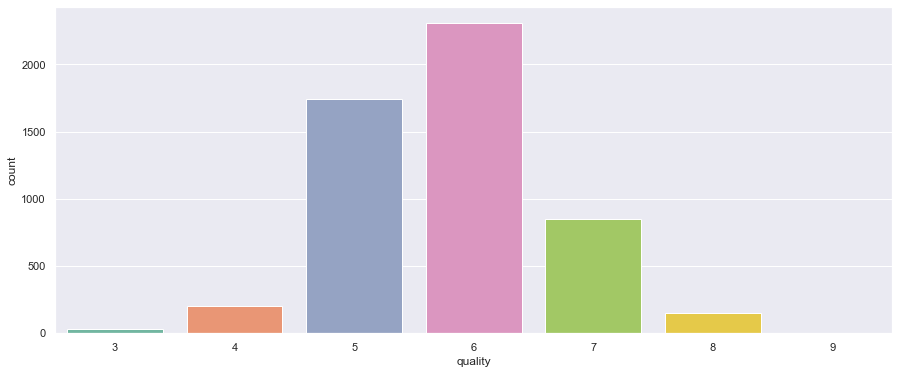

In [29]:
ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x=d1, data=X, palette="Set2")
plt.show()

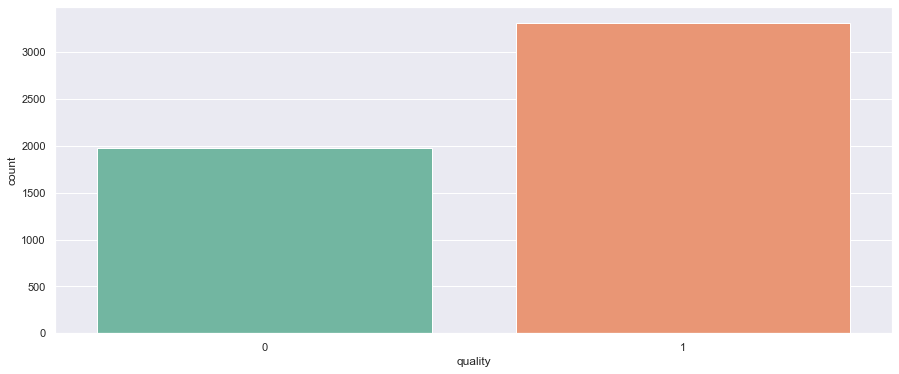

In [30]:
ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x=d2, data=X, palette="Set2")
plt.show()

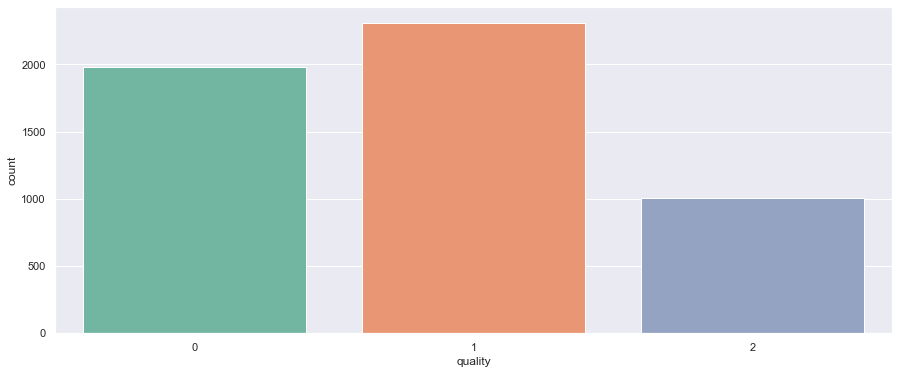

In [31]:
ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(x=d3, data=X, palette="Set2")
plt.show()

Here we see that we have imbalanced data. Let's fix it using RandomOverSampler.

In [32]:
features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [33]:
oversample =  RandomOverSampler(random_state=0)

In [34]:
X1, d1 = oversample.fit_resample(X, d1)

In [35]:
X2, d2 = oversample.fit_resample(X, d2)

In [36]:
X3, d3 = oversample.fit_resample(X, d3)

Let's split our data to train and test parts for training models.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, d1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, d2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, d3, test_size=0.2, random_state=42)

Let's define a function which help us see classification models results.

In [38]:
def report(y_test, preds):
    print(classification_report(y_test, preds))
    print('Confusion Metrics :\n', confusion_matrix(y_test, preds))
    print('F1 Score: ', f1_score(y_test, preds, average='micro'))
    print('Precision Score:', metrics.precision_score(y_test, preds, average="micro"))
    print('Accuracy: ',metrics.accuracy_score(y_test, preds))

 # RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

In [40]:
report(y_test, preds)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.43      0.06      0.10        52
           5       0.64      0.64      0.64       362
           6       0.53      0.72      0.61       430
           7       0.50      0.34      0.40       166
           8       0.50      0.03      0.05        38
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1059
   macro avg       0.37      0.25      0.26      1059
weighted avg       0.55      0.56      0.54      1059

Confusion Metrics :
 [[  0   0   7   3   0   0   0]
 [  0   3  30  19   0   0   0]
 [  0   3 230 123   6   0   0]
 [  0   1  87 308  34   0   0]
 [  0   0   5 104  56   1   0]
 [  0   0   0  23  14   1   0]
 [  0   0   0   0   1   0   0]]
F1 Score:  0.5646836638338055
Precision Score: 0.5646836638338055
Accuracy:  0.5646836638338055


In [41]:
rf1 = RandomForestClassifier()
rf1.fit(X_train1,y_train1)
preds1 = rf1.predict(X_test1)

In [42]:
report(y_test1, preds1)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       454
           4       0.98      1.00      0.99       488
           5       0.76      0.80      0.78       465
           6       0.71      0.58      0.64       462
           7       0.84      0.93      0.88       465
           8       1.00      1.00      1.00       461
           9       1.00      1.00      1.00       441

    accuracy                           0.90      3236
   macro avg       0.90      0.90      0.90      3236
weighted avg       0.90      0.90      0.90      3236

Confusion Metrics :
 [[454   0   0   0   0   0   0]
 [  0 488   0   0   0   0   0]
 [  0   6 373  79   7   0   0]
 [  0   4 116 268  74   0   0]
 [  0   0   4  29 432   0   0]
 [  0   0   0   0   0 461   0]
 [  0   0   0   0   0   0 441]]
F1 Score:  0.9014215080346106
Precision Score: 0.9014215080346106
Accuracy:  0.9014215080346106


Here we see that the data with oversampling gives better result as without oversampling.
Now I will try random forest model for d1 and d2.

In [43]:
rf2 = RandomForestClassifier()
rf2.fit(X_train2,y_train2)
preds2 = rf2.predict(X_test2)

rf3 = RandomForestClassifier()
rf3.fit(X_train3,y_train3)
preds3 = rf3.predict(X_test3)

In [44]:
report(y_test2, preds2)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       667
           1       0.89      0.81      0.84       660

    accuracy                           0.85      1327
   macro avg       0.86      0.85      0.85      1327
weighted avg       0.85      0.85      0.85      1327

Confusion Metrics :
 [[598  69]
 [127 533]]
F1 Score:  0.8522984174830445
Precision Score: 0.8522984174830445
Accuracy:  0.8522984174830445


In [45]:
report(y_test3, preds3)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       469
           1       0.67      0.54      0.60       462
           2       0.82      0.94      0.87       456

    accuracy                           0.75      1387
   macro avg       0.74      0.75      0.74      1387
weighted avg       0.74      0.75      0.74      1387

Confusion Metrics :
 [[362 103   4]
 [118 251  93]
 [  6  22 428]]
F1 Score:  0.7505407354001442
Precision Score: 0.7505407354001442
Accuracy:  0.7505407354001442


# KNN

In [46]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train1, y_train1)
preds1 = knn1.predict(X_test1)
report(y_test1, preds1)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       454
           4       0.85      1.00      0.92       488
           5       0.64      0.57      0.60       465
           6       0.48      0.32      0.38       462
           7       0.66      0.70      0.68       465
           8       0.86      1.00      0.92       461
           9       1.00      1.00      1.00       441

    accuracy                           0.80      3236
   macro avg       0.78      0.80      0.79      3236
weighted avg       0.78      0.80      0.78      3236

Confusion Metrics :
 [[454   0   0   0   0   0   0]
 [  0 488   0   0   0   0   0]
 [  3  52 266  96  44   4   0]
 [  2  34 132 148 121  25   0]
 [  2   2  20  67 326  46   2]
 [  0   0   0   0   0 461   0]
 [  0   0   0   0   0   0 441]]
F1 Score:  0.7985166872682324
Precision Score: 0.7985166872682324
Accuracy:  0.7985166872682324


In [47]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train2, y_train2)
preds2 = knn2.predict(X_test2)
report(y_test2, preds2)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       667
           1       0.78      0.74      0.76       660

    accuracy                           0.77      1327
   macro avg       0.77      0.77      0.77      1327
weighted avg       0.77      0.77      0.77      1327

Confusion Metrics :
 [[529 138]
 [172 488]]
F1 Score:  0.7663903541823662
Precision Score: 0.7663903541823662
Accuracy:  0.7663903541823662


In [48]:
knn3 = KNeighborsClassifier()
knn3.fit(X_train3, y_train3)
preds3 = knn3.predict(X_test3)
report(y_test3, preds3)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       469
           1       0.52      0.42      0.47       462
           2       0.69      0.79      0.73       456

    accuracy                           0.64      1387
   macro avg       0.63      0.64      0.64      1387
weighted avg       0.63      0.64      0.64      1387

Confusion Metrics :
 [[342  99  28]
 [135 193 134]
 [ 22  76 358]]
F1 Score:  0.6438356164383562
Precision Score: 0.6438356164383562
Accuracy:  0.6438356164383562


# LogisticRegression

In [49]:
log1 = LogisticRegression()
log1.fit(X_train1,y_train1)
preds1 = log1.predict(X_test1)
report(y_test1, preds1)

              precision    recall  f1-score   support

           3       0.49      0.50      0.49       454
           4       0.51      0.49      0.50       488
           5       0.43      0.47      0.45       465
           6       0.34      0.27      0.30       462
           7       0.41      0.30      0.35       465
           8       0.49      0.59      0.54       461
           9       0.84      1.00      0.91       441

    accuracy                           0.51      3236
   macro avg       0.50      0.52      0.50      3236
weighted avg       0.50      0.51      0.50      3236

Confusion Metrics :
 [[225  70  51  36   0  28  44]
 [ 94 240  83  38  13  20   0]
 [ 53  91 220  63  25  10   3]
 [ 39  46 112 123  81  58   3]
 [ 19  17  31  69 140 170  19]
 [ 31  11  11  35  82 273  18]
 [  0   0   0   0   0   0 441]]
F1 Score:  0.5135970333745364
Precision Score: 0.5135970333745364
Accuracy:  0.5135970333745364


In [50]:
log2 = LogisticRegression()
log2.fit(X_train2,y_train2)
preds2 = log2.predict(X_test2)
report(y_test2, preds2)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       667
           1       0.73      0.74      0.74       660

    accuracy                           0.74      1327
   macro avg       0.74      0.74      0.74      1327
weighted avg       0.74      0.74      0.74      1327

Confusion Metrics :
 [[490 177]
 [172 488]]
F1 Score:  0.7370007535795027
Precision Score: 0.7370007535795027
Accuracy:  0.7370007535795027


In [51]:
log3 = LogisticRegression()
log3.fit(X_train3,y_train3)
preds3 = log3.predict(X_test3)
report(y_test3, preds3)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       469
           1       0.44      0.35      0.39       462
           2       0.64      0.72      0.68       456

    accuracy                           0.59      1387
   macro avg       0.58      0.59      0.58      1387
weighted avg       0.58      0.59      0.58      1387

Confusion Metrics :
 [[331 104  34]
 [149 162 151]
 [ 30  99 327]]
F1 Score:  0.5912040374909877
Precision Score: 0.5912040374909877
Accuracy:  0.5912040374909877


### As seen we get the best result for model rf1. Let's improve results with cross-validation.

In [52]:
rf1 = RandomForestClassifier()
rf1.fit(X_train1,y_train1)
preds1 = rf1.predict(X_test1)
report(y_test1, preds1)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       454
           4       0.98      1.00      0.99       488
           5       0.75      0.81      0.77       465
           6       0.71      0.57      0.63       462
           7       0.85      0.93      0.89       465
           8       1.00      1.00      1.00       461
           9       1.00      1.00      1.00       441

    accuracy                           0.90      3236
   macro avg       0.90      0.90      0.90      3236
weighted avg       0.90      0.90      0.90      3236

Confusion Metrics :
 [[454   0   0   0   0   0   0]
 [  0 488   0   0   0   0   0]
 [  0   4 375  79   7   0   0]
 [  0   4 124 264  69   1   0]
 [  0   0   4  28 432   1   0]
 [  0   0   0   0   0 461   0]
 [  0   0   0   0   0   0 441]]
F1 Score:  0.9008034610630408
Precision Score: 0.9008034610630408
Accuracy:  0.9008034610630408


In [53]:
importance = rf1.feature_importances_
feature_imp = pd.Series(importance, index=X.columns).sort_values(ascending=False)
feature_imp

alcohol                 0.113562
density                 0.108602
chlorides               0.104790
free sulfur dioxide     0.100101
fixed acidity           0.091054
pH                      0.088396
volatile acidity        0.085190
total sulfur dioxide    0.082000
residual sugar          0.077592
citric acid             0.072267
sulphates               0.071558
type                    0.004888
dtype: float64

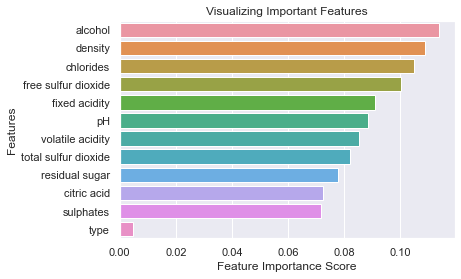

In [54]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show() 

In [55]:
init_notebook_mode(connected=True)
q3 = data[data.quality == 3]
q4 = data[data.quality == 4]
q5 = data[data.quality == 5]
q6 = data[data.quality == 6]
q7 = data[data.quality == 7]
q8 = data[data.quality == 8]
q9 = data[data.quality == 9]

def group(q,k,col):
    quality = go.Scatter3d(
        x=q.density,
        y=q.alcohol,
        z=q.chlorides,
        mode='markers',
        name = "quality-"+ k,
        marker=dict(
            color=col,
            size=5,
        )
    )
    return quality

q3 = group(q3, "3", 'red')
q4 = group(q4, "4", 'blue')
q5 = group(q5, "5", 'silver')
q6 = group(q6, "6", 'teal')
q7 = group(q7, "7", 'yellow')
q8 = group(q8, "8", 'plum')
q9 = group(q9, "9", 'aqua')


d = [q3, q4, q5, q6, q7, q8, q9]

layout = go.Layout(
    title = ' 3D interactive graph with the first 3 important features ',
)
fig = go.Figure(data=d, layout=layout)
iplot(fig)

In [56]:
final_data=X.drop(['type', 'sulphates', 'citric acid', 'residual sugar', 'total sulfur dioxide'], axis=1)

In [57]:
D, l = oversample.fit_resample(final_data, final_label)

In [58]:
X_trf, X_tsf, y_trf, y_tsf = train_test_split(D, l, test_size=0.3, random_state=42)

In [59]:
final_model = RandomForestClassifier()
final_model.fit(X_trf,y_trf)
final_preds = final_model.predict(X_tsf)
report(y_tsf, final_preds)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       660
           4       0.97      1.00      0.99       727
           5       0.72      0.77      0.74       691
           6       0.69      0.53      0.60       711
           7       0.80      0.91      0.85       677
           8       0.99      1.00      0.99       711
           9       1.00      1.00      1.00       677

    accuracy                           0.89      4854
   macro avg       0.88      0.89      0.88      4854
weighted avg       0.88      0.89      0.88      4854

Confusion Metrics :
 [[660   0   0   0   0   0   0]
 [  0 727   0   0   0   0   0]
 [  0  12 531 125  23   0   0]
 [  0   9 195 377 127   3   0]
 [  0   0  10  45 617   5   0]
 [  0   0   0   0   0 711   0]
 [  0   0   0   0   0   0 677]]
F1 Score:  0.8858673259167696
Precision Score: 0.8858673259167696
Accuracy:  0.8858673259167696


In [60]:
scores = cross_val_score(final_model, X_trf, y_trf, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.01)


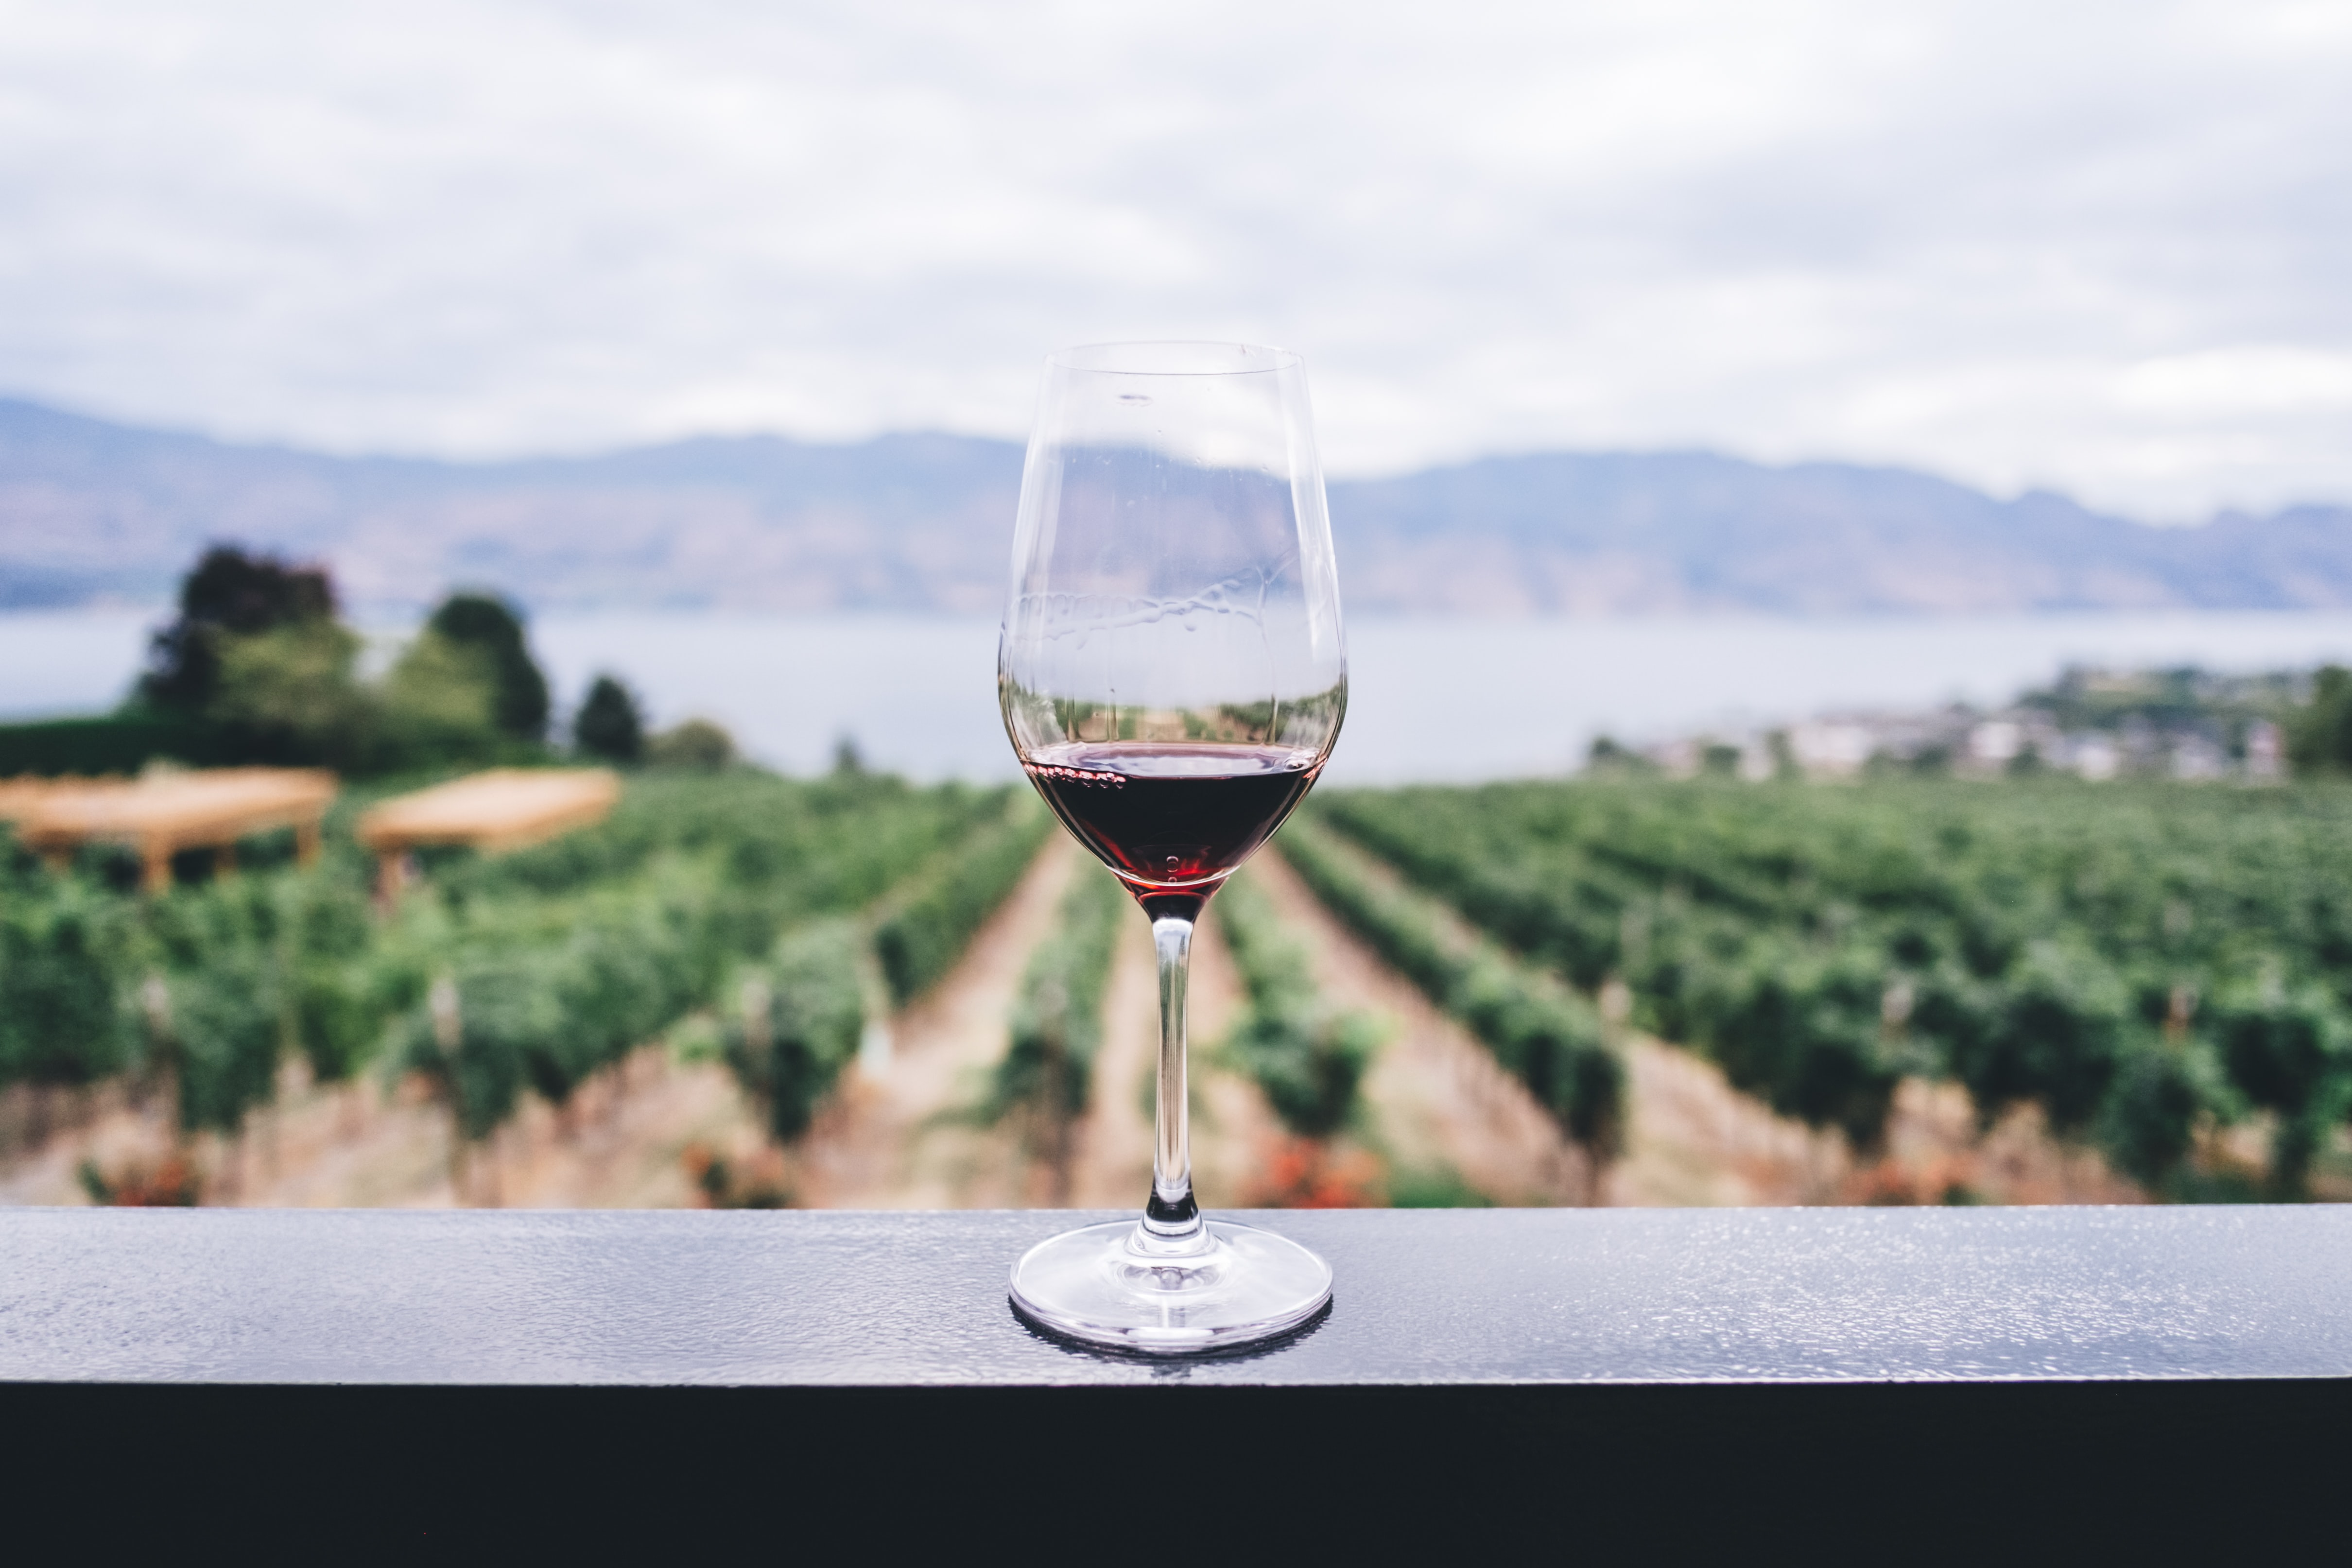

In [61]:
display.Image("images/1.jpg")

# Thank You